# Lecture 7c - Kolmogorov-Smirnov Test

From DeGroot Chapter 10.6:

`The Kolmogorov-Smirnov test is a nonparametric test that tests the null hypotheses that a random sample arose from a particular continuous distribution (one-sample K-S test) or that two independent random samples arose from the same continuous distribution (two-sample K-S test).`

In other words, the Kolmogorov-Smirnov test is a goodness-of-fit test for continuous distributions.

The one-sample K-S test works by testing the null hypothesis that the empirical/sample cdf $F_n(x)$ defined by our data is actually a particular continuous cdf $F^*(x)$.

Formally,

\begin{align*}
    H_0 &: F(x) = F^*(x) \\ 
    H_1 &: \text{The hypothesis $H_0$ is not true.}
\end{align*}

We reject $H_0$ when the following holds:

\begin{align*}
    n^{1/2}D^*_n \geq c
\end{align*}

where $n$ is the sample size, $c$ is the critical value, and $D_n^*$ is the following statistic:

\begin{align*}
    D_n^* = \underset{-\infty < x < \infty}{\sup} |F_n(x) - F^*(x)|
\end{align*}

In other words, $D_n^*$ is the maximum difference between the empirical cdf and our hypothesized cdf.

## Example - Testing Normality

---

<i>Note: There are multiple tests one can use to determine the normality of a random sample. See [`here`](https://www.youtube.com/watch?v=TyjYI7yjFZI) for other tests.</i>

---

Suppose that it is desired to test the null hypothesis that a certain random sample of 25 observations was drawn from a standard normal distribution.

The 25 observed values in the sample, <u>in order of the smallest to the largest</u>, are designated as $y_1, \ldots, y_{25}$.

In [1]:
import numpy as np
from scipy.stats import norm

# Note that y is already sorted
n = 25
y = [-2.46, -2.11, -1.23, -0.99, -0.42, -0.39, -0.21, -0.15, -0.10, -0.07, -0.02, 
     0.27, 0.40, 0.42, 0.44, 0.70, 0.81, 0.88, 1.07, 1.39, 1.40, 1.47, 1.62, 1.64, 1.76]

First, let us construct the empirical cdf $F_n(y_i)$.

In [2]:
print([i+1 for i in range(n)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [3]:
sample_cdf = np.array([i+1 for i in range(n)])/n
print(sample_cdf)

[0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56
 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.  ]


To perform the K-S test, let us assume that the null hypothesis is true, i.e. that the data we observed was actually generated by the standard normal distribution. 

Now, let us calculate the hypothesized cdf values $\Phi(y_i)$.

In [4]:
null_cdf = norm.cdf(y)
print(null_cdf)

[0.00694685 0.01742918 0.10934855 0.16108706 0.33724273 0.34826827
 0.41683384 0.44038231 0.46017216 0.47209683 0.49202169 0.60641987
 0.65542174 0.66275727 0.67003145 0.75803635 0.79102991 0.81057035
 0.85769035 0.91773556 0.91924334 0.92921912 0.94738386 0.94949742
 0.9607961 ]


Then we calculate the $D_n^*$ statistic.

---

<img src = "d_n.PNG" width = "500"/>

---

In [5]:
# shift the hypothesized cdf values by dropping the first entry then appending 1
shifted_null_cdf = np.append(null_cdf[1:], 1)
print(shifted_null_cdf)

[0.01742918 0.10934855 0.16108706 0.33724273 0.34826827 0.41683384
 0.44038231 0.46017216 0.47209683 0.49202169 0.60641987 0.65542174
 0.66275727 0.67003145 0.75803635 0.79102991 0.81057035 0.85769035
 0.91773556 0.91924334 0.92921912 0.94738386 0.94949742 0.9607961
 1.        ]


In [6]:
D = np.abs(shifted_null_cdf - sample_cdf)
print(D)

[0.02257082 0.02934855 0.04108706 0.17724273 0.14826827 0.17683384
 0.16038231 0.14017216 0.11209683 0.09202169 0.16641987 0.17542174
 0.14275727 0.11003145 0.15803635 0.15102991 0.13057035 0.13769035
 0.15773556 0.11924334 0.08921912 0.06738386 0.02949742 0.0007961
 0.        ]


In [7]:
D_stat = np.max(D)
print(D_stat)

0.17724272684824952


Then we calculate $n^{1/2}D^*_n$.

In [8]:
ks_stat = np.sqrt(n)*D_stat
print(ks_stat)

0.8862136342412475


To find the critical value to which we should compare this to, we can use the table provided in DeGroot:

<img src = "k-s table.PNG" width = "300"/>

Since $n^{1/2}D^*_n \approx 0.90$ and $H(0.90) = 0.6$, the p-value is approximately $0.4$.

Therefore, we would only accept the null hypothesis at $\alpha$ levels smaller than $0.4$.

In other words, the data was (probably) generated by a standard normal distribution. It is a good fit.

### Using Scipy Stats

Let's perform the K-S test using scipy stats.

In [9]:
from scipy.stats import kstest

ks_test_result = kstest(y, norm.cdf, mode = 'asymp')
print(ks_test_result)

KstestResult(statistic=0.17724272684824952, pvalue=0.4120446030408483)


## Example - Testing the Normality of Stock Returns

A common assumption in mathematical finance is that stock returns are iid normal random variables.

Let's us put that assumption to the test.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 10]

df_stocks = pd.read_csv('ph_stocks.csv')

df_stocks.head(5)

,Date,AC,MER,SM
0,01/04/2010,250.000,195.977,173.333
1,01/05/2010,250.000,201.856,173.333
2,01/06/2010,250.000,200.876,170.667
3,01/07/2010,247.917,203.816,173.333
4,01/08/2010,247.917,199.896,172.000


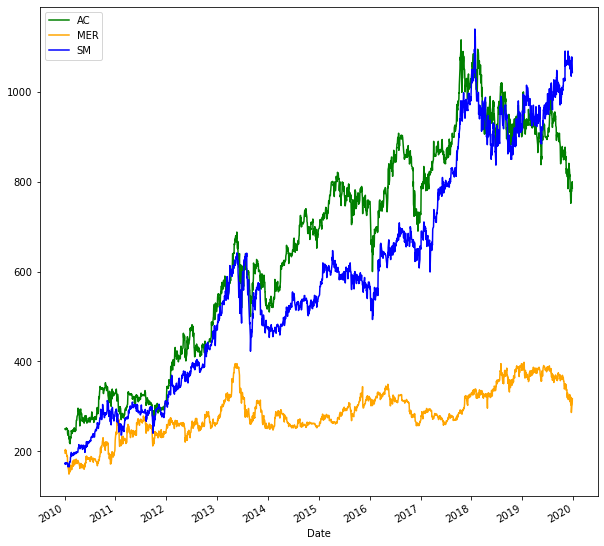

In [11]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

df_stocks.set_index('Date').plot(color = ['green', 'orange', 'blue'])
plt.show()

In [12]:
df_returns = df_stocks[1:].copy()
df_returns['AC'] = df_stocks['AC'].diff()[1:].to_numpy()/df_stocks['AC'][:-1].to_numpy()
df_returns['MER'] = df_stocks['MER'].diff()[1:].to_numpy()/df_stocks['MER'][:-1].to_numpy()
df_returns['SM'] = df_stocks['SM'].diff()[1:].to_numpy()/df_stocks['SM'][:-1].to_numpy()

df_returns.head(5)

,Date,AC,MER,SM
1,2010-01-05,0.000000,0.029998,0.000000
2,2010-01-06,0.000000,-0.004855,-0.015381
3,2010-01-07,-0.008332,0.014636,0.015621
4,2010-01-08,0.000000,-0.019233,-0.007690
5,2010-01-11,0.008402,0.004903,0.007750


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


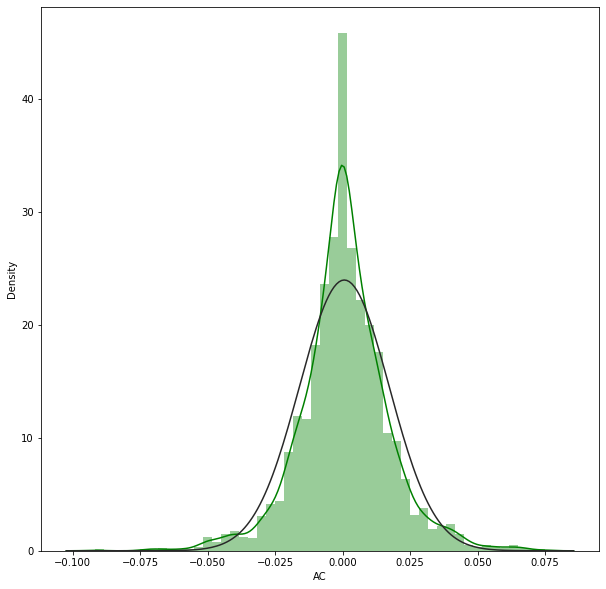

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


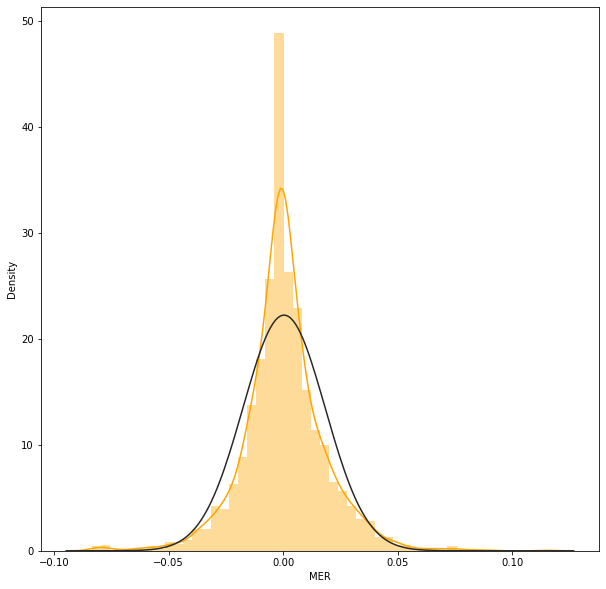

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


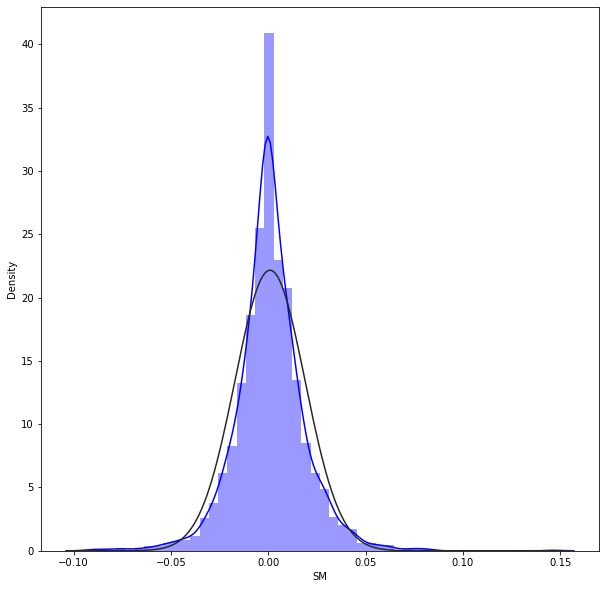

In [13]:
sns.distplot(df_returns['AC'], color = 'green', fit = norm)
plt.show()

sns.distplot(df_returns['MER'], color = 'orange', fit = norm)
plt.show()

sns.distplot(df_returns['SM'], color = 'blue', fit = norm)
plt.show()

In [14]:
ac_norm = (df_returns['AC'] - np.mean(df_returns['AC']))/np.std(df_returns['AC'])
ks_test_ac = kstest(ac_norm, norm.cdf)
print('AC:', ks_test_ac)

mer_norm = (df_returns['MER'] - np.mean(df_returns['MER']))/np.std(df_returns['MER'])
ks_test_mer = kstest(mer_norm, norm.cdf)
print('MER:', ks_test_mer)

sm_norm = (df_returns['SM'] - np.mean(df_returns['SM']))/np.std(df_returns['SM'])
ks_test_sm = kstest(sm_norm, norm.cdf)
print('SM:', ks_test_sm)

AC: KstestResult(statistic=0.05983262476656337, pvalue=5.0536250941377115e-08)
MER: KstestResult(statistic=0.08147145402241895, pvalue=1.6349740053503863e-14)
SM: KstestResult(statistic=0.06641444972105143, pvalue=8.720789403862556e-10)


It's seems that the evidence overwhelmingly suggests that stock returns are in fact NOT normal.

We can also see this if we draw a Q-Q plot.

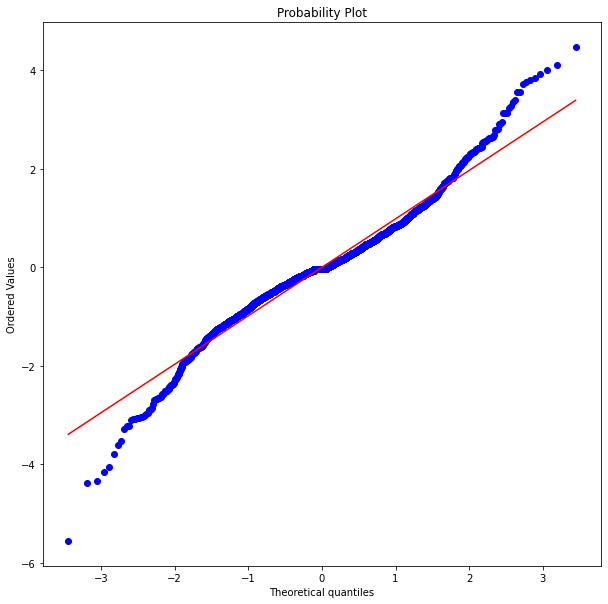

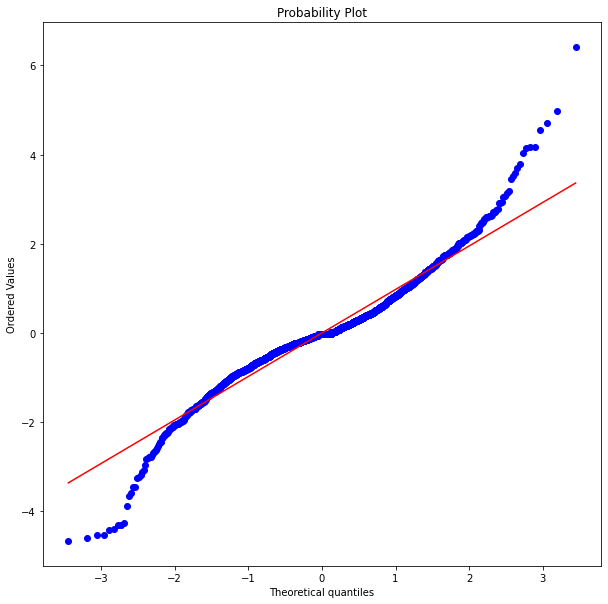

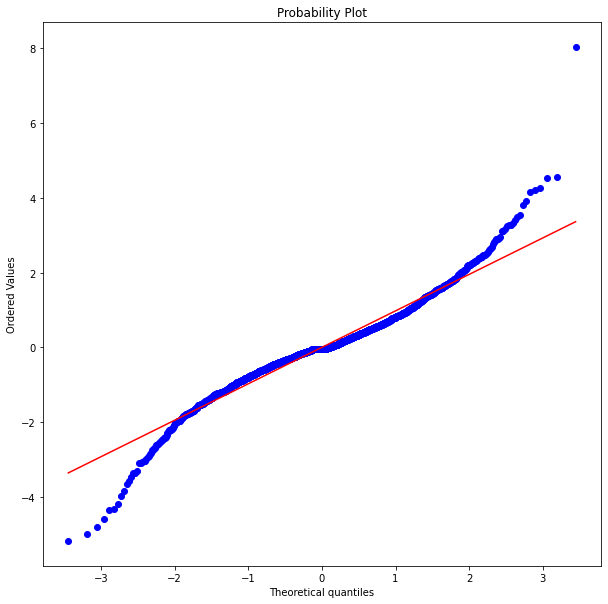

In [15]:
from scipy.stats import probplot
 
probplot(ac_norm, dist = "norm", plot = plt)
plt.show()

probplot(mer_norm, dist = "norm", plot = plt)
plt.show()

probplot(sm_norm, dist = "norm", plot = plt)
plt.show()

## HW3 - Distribution Models for Stock Returns

Can you find another distribution that has a better fit for our stock returns data?

Create a notebook that explores this question. Try out several distributions and use the Kolmogorov-Smirnov test to measure goodness-of-fit.

Submission by LT. Deadline is next meeting (July 21).